#IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import wave
import struct
import librosa
import librosa.display
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from tensorflow import keras
import csv

from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#Tạo dataframe ngang

In [ ]:
def findCSV_filename(path_to_dir, suffix=".csv"):
    filenames = os.listdir(path_to_dir)
    return sorted([filename for filename in filenames if filename.endswith(suffix)])

def getProfile_id(filenames):
    profile_id = []
    for item in filenames:
        for i in range(500):
            profile_id.append(item[:4])
    return profile_id

def getGait_status(filenames):
    gaitStatus = []
    for item in filenames:
        for i in range(500):
            gaitStatus.append(item[4:6])
    return gaitStatus

def createDataframe(filenames):
    i = 1
    df = pd.read_csv(os.path.join("/content/drive/MyDrive/DATA/thi/fulldataset", filenames[0]))
    while i < len(filenames):
        df_temporary = pd.read_csv(os.path.join("/content/drive/MyDrive/DATA/thi/fulldataset", filenames[i]))
        df = pd.concat([df, df_temporary]).reset_index(drop=True)
        i += 1
    return df

def insertColumns(df, gaitStatus, profile_id):
    df['Gait_Status'] = gaitStatus
    df['Profile_ID'] = profile_id
    return df

def createHorizontalDataframe(df, filenames):
    profile_id = []
    for item in filenames:
        profile_id.append(item[:4])

    gaitStatus = []
    for item in filenames:
        gaitStatus.append(item[4:6])

    xac = []
    for i in range(500):
        xac.append("Xac{:0>3}".format(i))
    yac = []
    for i in range(500):
        yac.append("Yac{:0>3}".format(i))
    zac = []
    for i in range(500):
        zac.append("Zac{:0>3}".format(i))
    xang = []
    for i in range(500):
        xang.append("RotX{:0>3}".format(i))
    yang = []
    for i in range(500):
        yang.append("RotY{:0>3}".format(i))
    zang = []
    for i in range(500):
        zang.append("RotZ{:0>3}".format(i))
    tempo = []
    for i in range(500):
        tempo.append("Tempo{:0>3}".format(i))

    columns_label = [xac, yac, zac, xang, yang, zang, tempo]
    columns_df = []
    columns_df.append('profile_ID')
    columns_df.append('Gait Status')

    for item in columns_label:
        for i in range(500):
            columns_df.append(item[i])

    columns_labelstring = ['xac', 'yac', 'zac', 'xang', 'yang', 'zang', 'tempo']
    df_horizontal = pd.DataFrame(columns=columns_df)

    count_concat = 0
    j = 0
    k = 500

    while count_concat < len(filenames):
        vetorzao = []
        vetorzao.append(profile_id[count_concat])
        vetorzao.append(gaitStatus[count_concat])

        for s in range(len(columns_labelstring)):
            for i in range(j, k):
                vetorzao.append(df['{}'.format(columns_labelstring[s])][i])

        df_horizontalbuffer = pd.DataFrame([vetorzao], columns=columns_df)
        df_horizontal = pd.concat([df_horizontal, df_horizontalbuffer]).reset_index(drop=True)
        j += 500
        k += 500
        count_concat += 1

    return df_horizontal


In [ ]:
filenames = findCSV_filename("/content/drive/MyDrive/DATA/thi/fulldataset")

gaitStatus = getGait_status(filenames)

profile_id = getProfile_id(filenames)

dataframe = createDataframe(filenames)


In [ ]:
dataframe.shape

(30000, 8)

In [ ]:
dataframe = insertColumns(dataframe,gaitStatus,profile_id)

In [ ]:
dataframe.head()

,xac,yac,zac,xang,yang,zang,tempo,amostra,Gait_Status,Profile_ID
0,3026,-2492,12581,301,-416,-335,0,0,MM,0141
1,3093,-2474,13472,356,-455,-433,3128,1,MM,0141
2,3427,-2805,14781,432,-504,-533,12812,2,MM,0141
3,5109,-3238,16538,515,-523,-625,23117,3,MM,0141
4,8196,-4270,20070,635,-411,-714,32763,4,MM,0141


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   xac          30000 non-null  int64 
 1   yac          30000 non-null  int64 
 2   zac          30000 non-null  int64 
 3   xang         30000 non-null  int64 
 4   yang         30000 non-null  int64 
 5   zang         30000 non-null  int64 
 6   tempo        30000 non-null  int64 
 7   amostra      30000 non-null  int64 
 8   Gait_Status  30000 non-null  object
 9   Profile_ID   30000 non-null  object
dtypes: int64(8), object(2)
memory usage: 2.3+ MB


In [ ]:
option = input("\nDigite a opção desejada: \n\t 0 - Criar um novo dataframe\n\t 1 - Importar um dataframe existente\n")
print("Opção selecionada: {}".format(option))

if option == "0":
    df = createHorizontalDataframe(dataframe, filenames)
    df.to_csv("/content/drive/MyDrive/DATA/thi/gait_dataset.csv", index=False)
elif option == "1":
    df = pd.read_csv("/content/drive/MyDrive/DATA/thi/gait_dataset .csv")



Digite a opção desejada: 
	 0 - Criar um novo dataframe
	 1 - Importar um dataframe existente
1
Opção selecionada: 1


In [ ]:
df.head()

profile_ID Gait Status  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  \
0         141          MM    3026    3093    3427    5109    8196    9133   
1         141          MN     264    5223    7610    3760    1422    1083   
2         141          MS   10608    9584    9256    9384    9868    9701   
3         142          MM   25883   12111    3222   -2341   -5917   -7103   
4         142          MN   -9626  -11823  -15454  -18428  -17249  -12304   

   Xac006  Xac007  Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  \
0    4440   -2949   -8654  -10756   -8700   -3481    2431    5885    4599   
1     729    -686   -1194   -2333   -1982    -972    -315     436    1119   
2   10049   10253   10193   10196   10167   10035    9021    8960    8332   
3   -6798   -5321   -4026   -2599    -446     977    1894    3271    2799   
4   -8399   -7566   -8489   -8505   -9289   -6348    7662   24004   26844   

   Xac015  Xac016  Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  \
0     421   -2916   -3994   -4146   -3212   -2508   -1845    -300     146   
1    1515    2283    2367    2309    1878    1583    1945    3393    4661   
2   -6195   28394   28766  -22716    7324   29498   24645   -8979  -25836   
3    -803   -3466   -3648   -2423    -758     266    1180    3329    5099   
4    7572  -10595  -16626   -7454    3901    6024    2184   -1185   -2013   

   Xac024  Xac025  Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  \
0    -175    -811   -1925   -3172   -2674     838    4470    5312    3728   
1    5485    5632    5366    5207    5794    7047    7180    7404    8474   
2  -21115   -4268    5394    5907    3365    2691    -386   -3566   -4766   
3    4679    3175    4077    6263    7916    9240   11654   15838   19396   
4   -2689   -2798   -2614   -2148      -4    3232    5621    5693    3037   

   Xac033  Xac034  Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  \
0    1424     552     535     882    1117    1349    1535    1065     615   
1   10112   12364   14802   15772   16350   19127   24855   30946   30894   
2   -4024   -2564   -1418    -944    -273    1042     969    -524   -2886   
3   22509   29148   29506   21789    5134   -5671  -13705  -21025  -22392   
4   -1000   -3350   -3046   -2188   -1072     443     687      -1   -1009   

   Xac042  Xac043  Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  \
0     165      83    -257   -1376   -1437    -253     943     -34    -813   
1   24159   17890   14852    6456  -13024   30257   30306    9019   27775   
2   -4227   -3537   -2720    -656     699     542    -241     480     843   
3   -9558  -18446  -25867    -283   30141   25075    8082   -6439   -8867   
4   -1129   -1270   -2701   -3585   -3705   -2442    -293     454     220   

   Xac051  Xac052  Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  \
0    2829    2005   -1065    2318    4513    6725    6893    5604    4776   
1    6133    6599    5973      34    -931    5121    8565    1794   -3591   
2     198    -170    -245    -377    -214    -300    -180    -100     477   
3   -3236    1848    2755    2278    3212    4441    3417    -287    -968   
4    -176    -997   -1054   -1388   -1965   -2737   -3074   -2924   -2803   

   Xac060  Xac061  Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  \
0    4321    4680    2645   -4542   -6393   -2443    1416    1994    2044   
1   -6217   -3841    -641     -68    1157    1279    -461   -1708   -2288   
2     602      42      -8     717    1536    1695    1608    1910    2351   
3     648    2089    1470     -95    -332    -588    1158    4391    9734   
4   -2668   -3138   -3610   -4059   -4133   -3846   -4067   -4584   -4463   

   Xac069  Xac070  Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  \
0    2890    3539    3566    2929     530   -2179   -2657    -792    1825   
1   -2407   -2831   -2993   -1838   -2142   -1861   -1838    -860    -242   
2    2178    2731    3659    3642    2526     952    1215    1165   

In [ ]:
df_with_dummies = pd.get_dummies(df, columns= ['Gait Status'], prefix = 'Gait_Status', drop_first= True)
df_with_dummies.head()


profile_ID  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  \
0         141    3026    3093    3427    5109    8196    9133    4440   -2949   
1         141     264    5223    7610    3760    1422    1083     729    -686   
2         141   10608    9584    9256    9384    9868    9701   10049   10253   
3         142   25883   12111    3222   -2341   -5917   -7103   -6798   -5321   
4         142   -9626  -11823  -15454  -18428  -17249  -12304   -8399   -7566   

   Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  \
0   -8654  -10756   -8700   -3481    2431    5885    4599     421   -2916   
1   -1194   -2333   -1982    -972    -315     436    1119    1515    2283   
2   10193   10196   10167   10035    9021    8960    8332   -6195   28394   
3   -4026   -2599    -446     977    1894    3271    2799    -803   -3466   
4   -8489   -8505   -9289   -6348    7662   24004   26844    7572  -10595   

   Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  \
0   -3994   -4146   -3212   -2508   -1845    -300     146    -175    -811   
1    2367    2309    1878    1583    1945    3393    4661    5485    5632   
2   28766  -22716    7324   29498   24645   -8979  -25836  -21115   -4268   
3   -3648   -2423    -758     266    1180    3329    5099    4679    3175   
4  -16626   -7454    3901    6024    2184   -1185   -2013   -2689   -2798   

   Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  \
0   -1925   -3172   -2674     838    4470    5312    3728    1424     552   
1    5366    5207    5794    7047    7180    7404    8474   10112   12364   
2    5394    5907    3365    2691    -386   -3566   -4766   -4024   -2564   
3    4077    6263    7916    9240   11654   15838   19396   22509   29148   
4   -2614   -2148      -4    3232    5621    5693    3037   -1000   -3350   

   Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  \
0     535     882    1117    1349    1535    1065     615     165      83   
1   14802   15772   16350   19127   24855   30946   30894   24159   17890   
2   -1418    -944    -273    1042     969    -524   -2886   -4227   -3537   
3   29506   21789    5134   -5671  -13705  -21025  -22392   -9558  -18446   
4   -3046   -2188   -1072     443     687      -1   -1009   -1129   -1270   

   Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  \
0    -257   -1376   -1437    -253     943     -34    -813    2829    2005   
1   14852    6456  -13024   30257   30306    9019   27775    6133    6599   
2   -2720    -656     699     542    -241     480     843     198    -170   
3  -25867    -283   30141   25075    8082   -6439   -8867   -3236    1848   
4   -2701   -3585   -3705   -2442    -293     454     220    -176    -997   

   Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  \
0   -1065    2318    4513    6725    6893    5604    4776    4321    4680   
1    5973      34    -931    5121    8565    1794   -3591   -6217   -3841   
2    -245    -377    -214    -300    -180    -100     477     602      42   
3    2755    2278    3212    4441    3417    -287    -968     648    2089   
4   -1054   -1388   -1965   -2737   -3074   -2924   -2803   -2668   -3138   

   Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  \
0    2645   -4542   -6393   -2443    1416    1994    2044    2890    3539   
1    -641     -68    1157    1279    -461   -1708   -2288   -2407   -2831   
2      -8     717    1536    1695    1608    1910    2351    2178    2731   
3    1470     -95    -332    -588    1158    4391    9734   10968    6067   
4   -3610   -4059   -4133   -3846   -4067   -4584   -4463   -4385   -4194   

   Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  \
0    3566    2929     530   -2179   -2657    -792    1825    2838    2939   
1   -2993   -1838   -2142   -1861   -1838    -860    -242     214     310   
2    3659    3642    2526     952    1215   

In [ ]:
tempo_drop = df_with_dummies.loc[:,'Tempo000':'Tempo499']

df_for_modeling= df_with_dummies.drop(['profile_ID',  'Gait_Status_MS'],
                         axis = 1)

df_for_modeling = df_for_modeling.drop(tempo_drop, axis = 1)

df_for_modeling.head()


Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  Xac008  \
0    3026    3093    3427    5109    8196    9133    4440   -2949   -8654   
1     264    5223    7610    3760    1422    1083     729    -686   -1194   
2   10608    9584    9256    9384    9868    9701   10049   10253   10193   
3   25883   12111    3222   -2341   -5917   -7103   -6798   -5321   -4026   
4   -9626  -11823  -15454  -18428  -17249  -12304   -8399   -7566   -8489   

   Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  Xac017  \
0  -10756   -8700   -3481    2431    5885    4599     421   -2916   -3994   
1   -2333   -1982    -972    -315     436    1119    1515    2283    2367   
2   10196   10167   10035    9021    8960    8332   -6195   28394   28766   
3   -2599    -446     977    1894    3271    2799    -803   -3466   -3648   
4   -8505   -9289   -6348    7662   24004   26844    7572  -10595  -16626   

   Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  Xac026  \
0   -4146   -3212   -2508   -1845    -300     146    -175    -811   -1925   
1    2309    1878    1583    1945    3393    4661    5485    5632    5366   
2  -22716    7324   29498   24645   -8979  -25836  -21115   -4268    5394   
3   -2423    -758     266    1180    3329    5099    4679    3175    4077   
4   -7454    3901    6024    2184   -1185   -2013   -2689   -2798   -2614   

   Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  Xac035  \
0   -3172   -2674     838    4470    5312    3728    1424     552     535   
1    5207    5794    7047    7180    7404    8474   10112   12364   14802   
2    5907    3365    2691    -386   -3566   -4766   -4024   -2564   -1418   
3    6263    7916    9240   11654   15838   19396   22509   29148   29506   
4   -2148      -4    3232    5621    5693    3037   -1000   -3350   -3046   

   Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  Xac044  \
0     882    1117    1349    1535    1065     615     165      83    -257   
1   15772   16350   19127   24855   30946   30894   24159   17890   14852   
2    -944    -273    1042     969    -524   -2886   -4227   -3537   -2720   
3   21789    5134   -5671  -13705  -21025  -22392   -9558  -18446  -25867   
4   -2188   -1072     443     687      -1   -1009   -1129   -1270   -2701   

   Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  Xac053  \
0   -1376   -1437    -253     943     -34    -813    2829    2005   -1065   
1    6456  -13024   30257   30306    9019   27775    6133    6599    5973   
2    -656     699     542    -241     480     843     198    -170    -245   
3    -283   30141   25075    8082   -6439   -8867   -3236    1848    2755   
4   -3585   -3705   -2442    -293     454     220    -176    -997   -1054   

   Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  Xac062  \
0    2318    4513    6725    6893    5604    4776    4321    4680    2645   
1      34    -931    5121    8565    1794   -3591   -6217   -3841    -641   
2    -377    -214    -300    -180    -100     477     602      42      -8   
3    2278    3212    4441    3417    -287    -968     648    2089    1470   
4   -1388   -1965   -2737   -3074   -2924   -2803   -2668   -3138   -3610   

   Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  Xac071  \
0   -4542   -6393   -2443    1416    1994    2044    2890    3539    3566   
1     -68    1157    1279    -461   -1708   -2288   -2407   -2831   -2993   
2     717    1536    1695    1608    1910    2351    2178    2731    3659   
3     -95    -332    -588    1158    4391    9734   10968    6067    1592   
4   -4059   -4133   -3846   -4067   -4584   -4463   -4385   -4194   -4107   

   Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  Xac080  \
0    2929     530   -2179   -2657    -792    1825    2838    2939    3558   
1   -1838   -2142   -1861   -1838    -860    -242     214     310      80   
2    3642    2526     952    1215    1165    2523    3759    3853   

In [ ]:
np.array([2,4]) + np.array([2,5])

array([4, 9])

In [ ]:
print(df.index)

RangeIndex(start=0, stop=60, step=1)


In [ ]:
len((np.array(df.loc[0,'Xac000':'Xac499'])
                      + np.array(df.loc[0, 'Yac000':'Yac499'])
                      + np.array(df.loc[0, 'Zac000':'Zac499'])
                      + np.array(df.loc[0, 'RotX000':'RotX499'])
                      + np.array(df.loc[0, 'RotY000':'RotY499'])
                      + np.array(df.loc[0, 'RotZ000':'RotZ499'])))

500

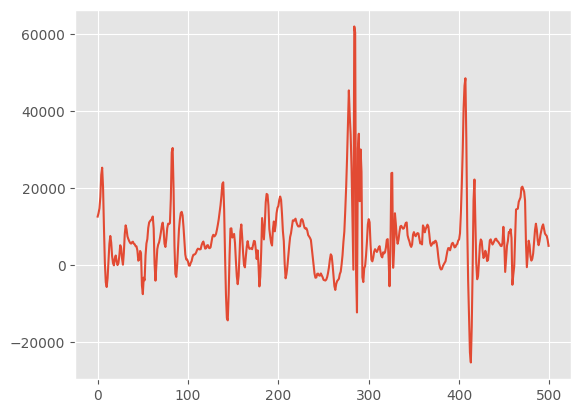

In [ ]:
plt.plot(((np.array(df.loc[0,'Xac000':'Xac499'])
                      + np.array(df.loc[0, 'Yac000':'Yac499'])
                      + np.array(df.loc[0, 'Zac000':'Zac499'])
                      + np.array(df.loc[0, 'RotX000':'RotX499'])
                      + np.array(df.loc[0, 'RotY000':'RotY499'])
                      + np.array(df.loc[0, 'RotZ000':'RotZ499']))))

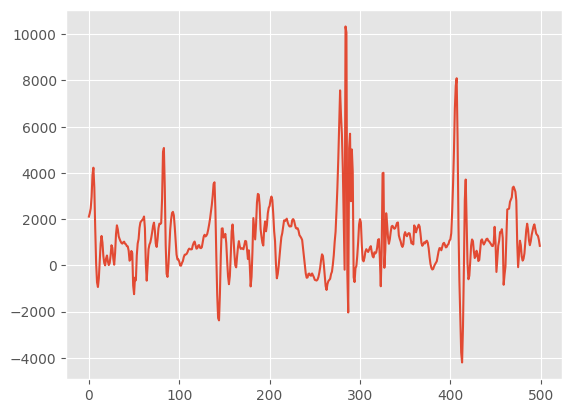

In [ ]:
plt.plot(((np.array(df.loc[0,'Xac000':'Xac499'])
                      + np.array(df.loc[0, 'Yac000':'Yac499'])
                      + np.array(df.loc[0, 'Zac000':'Zac499'])
                      + np.array(df.loc[0, 'RotX000':'RotX499'])
                      + np.array(df.loc[0, 'RotY000':'RotY499'])
                      + np.array(df.loc[0, 'RotZ000':'RotZ499'])))/6)

In [ ]:
def getRandID():

    profile_ID = list(df_horizontal['profile_ID'])
    Rand_ID = int(random.choice(profile_ID))

    return Rand_ID

def getRandGaitStatus(Rand_ID):

    Rand_GaitStatus = df_horizontal.iloc[Rand_ID-1, 1]

    return Rand_GaitStatus




In [ ]:
def findWAV_filename(path_to_dir, suffix = ".wav"):

    filenames = listdir(path_to_dir)
    return sorted([filename for filename in filenames if filename.endswith( suffix )])

In [ ]:
def MoveWavFiles(filenames):
    """
    Separa e move os arquivos .wav conforme a categoria da marcha (somente MS e MN).
    """

    MS_filenames = []
    MN_filenames = []
    MM_filenames = []
    for filename in filenames:
        if filename[4:6] == "MS":
            MS_filenames.append(filename)
        elif filename[4:6] == "MN":
            MN_filenames.append(filename)
        elif filename[4:6] == "MN":
            MM_filenames.append(filename)
    for filename in MS_filenames:
        os.replace(f"/content/drive/MyDrive/DATA/thi/wav/{filename}",
                   f"/content/drive/MyDrive/DATA/thi/wav/MS/{filename}")

    for filename in MN_filenames:
        os.replace(f"/content/drive/MyDrive/DATA/thi/wav/{filename}",
                   f"/content/drive/MyDrive/DATA/thi/wav/MN/{filename}")

    for filename in MM_filenames:
        os.replace(f"/content/drive/MyDrive/DATA/thi/wav/{filename}",
                   f"/content/drive/MyDrive/DATA/thi/wav/MM/{filename}")

In [ ]:
def raw_toWav(df):
    for currentIndex in range(len(df)):
        eixos = "Gait".split()
        for eixo in eixos:
            obj = wave.open('/content/drive/MyDrive/DATA/thi/wav/TwoInOne/{:0>3}{}_{}.wav'.format(
                df['profile_ID'][currentIndex], df['Gait Status'][currentIndex], eixo), 'wb')

            obj.setnchannels(1)
            obj.setsampwidth(2)
            obj.setframerate(100)
            obj.setnframes(30)

            bufferList = np.array(df.loc[currentIndex, 'Xac000':'RotZ499'])

            for value in bufferList:
                data = struct.pack('<h', value)
                obj.writeframesraw(data)

            obj.close()


In [ ]:
wav_filenames = findWAV_filename('/content/drive/MyDrive/DATA/thi/wav/TwoInOne')


In [ ]:
MoveWavFiles(wav_filenames)

In [ ]:
raw_toWav(df)

In [ ]:
gait_types = 'MM MN MS'.split()

In [ ]:
import os
import shutil

source_folder = '/content/drive/MyDrive/DATA/thi/wav/TwoInOne'

targets = {
    'MS': '/content/drive/MyDrive/DATA/thi/wav/MS',
    'MM': '/content/drive/MyDrive/DATA/thi/wav/MM',
    'MN': '/content/drive/MyDrive/DATA/thi/wav/MN'
}

for folder in targets.values():
    os.makedirs(folder, exist_ok=True)

for filename in os.listdir(source_folder):
    for key, dest_folder in targets.items():
        if key in filename:
            src_path = os.path.join(source_folder, filename)
            dst_path = os.path.join(dest_folder, filename)
            shutil.move(src_path, dst_path)
            break


#TRÍCH ĐẶC TRƯNG

In [ ]:

header = 'filename chroma_stft std_chroma spectral_centroid std_centroid spectral_bandwidth std_bandwidth rolloff std_rolloff zero_crossing_rate std_zcr'
for i in range(1, 21):
    header += f' mfcc{i} std_mfcc{i}'
header += ' label'
header = header.split()

file = open('test_data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for gait in gait_types:
    for filename in os.listdir(f'/content/drive/MyDrive/DATA/thi/wav/{gait}'):
        gaitname = f'/content/drive/MyDrive/DATA/thi/wav/{gait}/{filename}'
        y, sr = librosa.load(gaitname, mono=True, sr=125)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename[:-4].replace(" ", "").replace("-","")} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.mean(spec_cent)} {np.std(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.mean(rolloff)} {np.std(rolloff)} {np.mean(zcr)} {np.std(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)} {np.std(e)}'
        to_append += f' {gait}'
        file = open('test_data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


#TẢI LẠI MÔ HÌNH VÀ CHUẨN HÓA

In [ ]:
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
MODEL_LOAD_DIR = '/content/drive/MyDrive/DATA/trained_model_and_scalers'

In [ ]:
svm_model = joblib.load(os.path.join(MODEL_LOAD_DIR, 'svm_model.joblib'))
encoder = joblib.load(os.path.join(MODEL_LOAD_DIR, 'label_encoder.joblib'))
scaler_for_initial_features = joblib.load(os.path.join(MODEL_LOAD_DIR, 'scaler_for_initial_features.joblib'))
pca = joblib.load(os.path.join(MODEL_LOAD_DIR, 'pca_model.joblib'))
scaler_after_pca = joblib.load(os.path.join(MODEL_LOAD_DIR, 'scaler_after_pca.joblib'))
print("Đã tải mô hình SVM và tất cả các đối tượng tiền xử lý thành công!")

Đã tải mô hình SVM và tất cả các đối tượng tiền xử lý thành công!


In [ ]:
EXTERNAL_TEST_CSV_PATH = '/content/test_data.csv'

In [ ]:
external_test_data = pd.read_csv(EXTERNAL_TEST_CSV_PATH)
X_new_features_raw = external_test_data.drop(['filename', 'label'], axis=1)


In [ ]:
X_new_scaled_initial = scaler_for_initial_features.transform(X_new_features_raw)
print(f"Kích thước sau scaler_for_initial_features: {X_new_scaled_initial.shape}")


Kích thước sau scaler_for_initial_features: (60, 50)


In [ ]:
X_new_pca = pca.transform(X_new_scaled_initial)
print(f"Kích thước sau PCA: {X_new_pca.shape}")


Kích thước sau PCA: (60, 50)


In [ ]:
X_new_final = scaler_after_pca.transform(X_new_pca)
print(f"Kích thước X_new_final: {X_new_final.shape}")


Kích thước X_new_final: (60, 50)


In [ ]:
predictions_new = svm_model.predict(X_new_final)
print("\nCác dự đoán của mô hình trên dữ liệu kiểm tra mới:")
print(predictions_new)


Các dự đoán của mô hình trên dữ liệu kiểm tra mới:
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 2 1 1 1 1 1 1 1 2 0 1 1 1 1
 1 1 0 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2]


In [ ]:
decoded_predictions_new = encoder.inverse_transform(predictions_new)
print("\nCác dự đoán đã giải mã:")
print(decoded_predictions_new)


Các dự đoán đã giải mã:
['MM' 'MM' 'MM' 'MM' 'MM' 'MM' 'MM' 'MM' 'MM' 'MM' 'MN' 'MM' 'MM' 'MM'
 'MM' 'MM' 'MM' 'MN' 'MM' 'MN' 'MM' 'MN' 'MN' 'MS' 'MN' 'MN' 'MN' 'MN'
 'MN' 'MN' 'MN' 'MS' 'MM' 'MN' 'MN' 'MN' 'MN' 'MN' 'MN' 'MM' 'MS' 'MS'
 'MS' 'MS' 'MS' 'MS' 'MS' 'MM' 'MS' 'MS' 'MS' 'MN' 'MS' 'MS' 'MS' 'MS'
 'MS' 'MS' 'MS' 'MS']


#Kiểm thử trên tập dữ liệu mới


=== 📄 Báo cáo phân loại ===
              precision    recall  f1-score   support

          MM       0.81      0.85      0.83        20
          MN       0.79      0.75      0.77        20
          MS       0.90      0.90      0.90        20

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



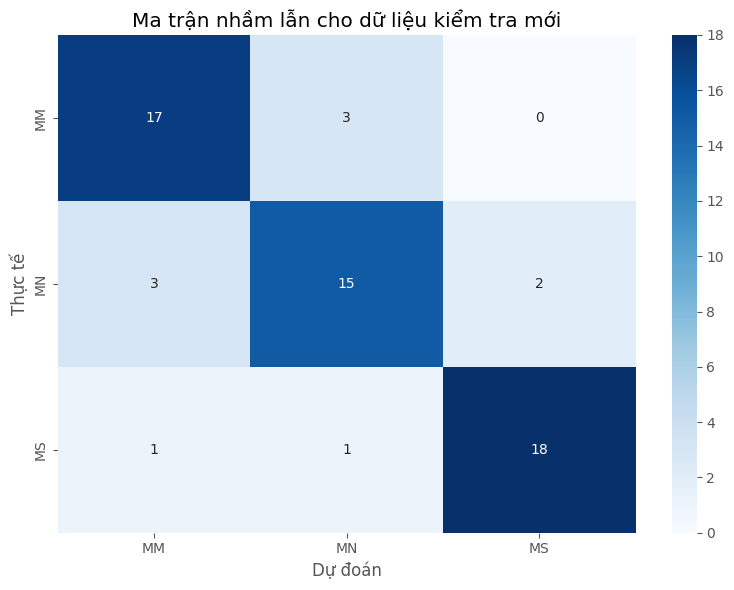

In [ ]:

y_new_true = external_test_data['label']
valid_indices = y_new_true.isin(encoder.classes_)
y_valid_true = y_new_true[valid_indices]
decoded_predictions_valid = decoded_predictions_new[valid_indices.to_numpy()]
decoded_y_true = y_valid_true.to_numpy()
print("\n=== 📄 Báo cáo phân loại ===")
print(classification_report(decoded_y_true, decoded_predictions_valid))
conf_matrix = confusion_matrix(decoded_y_true, decoded_predictions_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn cho dữ liệu kiểm tra mới')
plt.tight_layout()
plt.show()
